
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** 

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

- **Neuron:** A neuron is a node where data is processed. As a neural network trains a neuron retains a specific formula or search parameter that the data is passed through. An example of this would be in an image recognition neural network a specific neuron is tasked with looking at a specific region of the image for some kind of information, be it a color or contrast or if the pixels are even used or whatnot. That information is then passed on to the next layer.
- **Input Layer:** The input layer is where the data is initially entered into the neural network. The size of this layer depends upon how much information is being used. In the above example of a neuron for image processing, the input layer would need an entry for each pixel of the image being processed. 
- **Hidden Layer:** Hidden layers are the underlying layers of a neural network where the work is actully done. These layers are filled with a certain number of neurons the process the data and pass it to the next layer. An ideal way to think about this process, but not always (or maybe even often) the case in the real world, would be that one layer looks for information in a specific region of an image. Another layer then looks for shapes based on the information passed to it.
- **Output Layer:** The output layer is where a decision is made and reported. For the image processing example I've been using, let's say we wanted to check for specific digits in images. There are 10 digits to choose from. Based on the work done by the hidden layers information is passed to the output layer which then assigns probabilities to each of the possible digits. As the network runs and is trained hopefully this prediction gets narrowed down to reporting mostly only a single digit.
- **Activation Function:** The activation function choice in a given layer of the neural network is what determines whether each neuron passes on information to the next layer or not. Back to the image processing example.... One given neuron might look for pixels being used in the top left corner of the image. If there aren't any then the activation function doesn't, well, activate; the neuron doesn't pass any information. Another neuron looking for pixels in the image finds some and the activation function has the neuron determine a value, perhaps the percentage of used pixels in its region, which then gets passed to the next layer.

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

- **Back Propagation:** Back propagation is a means of checking the neural network process for error and passing that error back through the network to make corrections in hopes of making the network work better by fixing where the worst problems are occuring.

- **Gradient Decent:** Gradient descent is an optimization algorithm. It's based on a convex function and tweaks its parameters to minimize a given function to its local minimum

- **How Back-propagation and Gradient Decent are related:** In gradient descent we are trying to reach the minimum of the loss function with respect to the parameters using the derivatives calculated in the back-propagation.

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

A simple (single layer) perceptron has no hidden layers. This means that there can't be any work done to help narrow results before passing information to the output layer and making a prediction. In this case, the information is presented in the input layer and passed directly to the output layer. Ok, how would this work? Imagine a set of data scattered about between two classes, say reds and blues. Our simple perceptron takes in this data and tries to draw a straight line that best separates the two classes; it can move the y-intercept of the line up and down and it can change the slope all it wants. Depending on how the two classes are separated this might work great. But if there is a mix of reds and blues or they are clustered in more than two clustered it might not work out well. If we could add more layers to the perceptron and get a robust neural network then we could better handle the mixing and clustering. But the simple perceptron from Monday can't.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape

(300, 2)

In [3]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [4]:
2**2

4

In [5]:
4**4

256

This word is speled wrong. 

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [18]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# YOUR CODE HERE
# Create the model
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile the Model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
h1 = model1.fit(X, y, epochs=10)

Epoch 1/10


ValueError: ignored

In [11]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [12]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'name': 'dense_2_input',
   'ragged': False,
   'sparse': False}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_2',
   'trainable': True,
   'units': 1,
   'use_bias': True}}]

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [13]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [25]:
# build and fit model

# YOUR CODE HERE
# Create the model
model2 = Sequential()
model2.add(Dense(24, input_dim=2, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile the Model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
h2 = model2.fit(X, y, epochs=100, callbacks=[myCallback()])

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.6133
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7867
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.8500
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.8867
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.9067
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.9167
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.9100
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.9067
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.9133
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.9133
Epoch 11/

In [26]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [ ]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [22]:
!pip install mlxtend

In [27]:
X.shape, y.shape

((300, 2), (300,))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


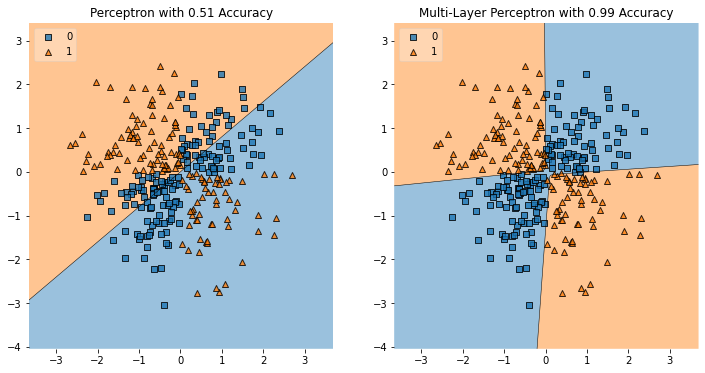

In [28]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

I'm assuming that is a type for the specific reason that model1 can only create a single line to divide the two different classes of data. In the plots above, model1 is trying to separate the squares from the triangles with ONE line. But that's not possible so it tries to do the best it can. 
But for model2, the multiple hidden layers allow the model to think in more terms than just one line which allows it to actually look at clusters. Since the dataset i clearly clustered it does a decent job. If I let it train a bit more (increase the epochs) or used a better model (add layers) it would likely do even better.

This idea of adding layers is useful for the reasons I've already stated above in my definitions and implied here: each layer can work on a task to pass to the next layer that refines the data. If you don't have layers to do this then it's just a best of fitting a line and not everything (and especially not images) can be expressed in linear regression.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1


In [36]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# YOUR CODE HERE
# Get the input data
X = df[df.columns[:13]]

# Convert to numpy array
X = X.to_numpy()

# Normalize all of X
from tensorflow.keras.utils import normalize

X = normalize(X)
X.shape, type(X)

((303, 13), numpy.ndarray)

In [37]:
# Get the target column
Y = df[df.columns[13:]]

# Convert to numpy array
Y = Y.to_numpy()
Y.shape, type(Y)

((303, 1), numpy.ndarray)

In [38]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [39]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [40]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [41]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [42]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(build_fn=create_model, verbose=0)

In [43]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [44]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

# YOUR CODE HERE
param_grid = {'batch_size': [40, 80],
              'epochs': [20, 100]}

In [45]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [49]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = gs.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   14.0s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   19.4s
[Parallel(n_jobs=6)]: Done  12 out of  20 | elapsed:   24.1s remaining:   16.1s
[Parallel(n_jobs=6)]: Done  15 out of  20 | elapsed:   28.1s remaining:    9.4s
[Parallel(n_jobs=6)]: Done  18 out of  20 | elapsed:   30.0s remaining:    3.3s
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:   30.3s finished


Best: 0.6045355081558228 using {'batch_size': 40, 'epochs': 100}
Means: 0.5516393303871154, Stdev: 0.0843390971090425 with: {'batch_size': 40, 'epochs': 20}
Means: 0.6045355081558228, Stdev: 0.1076194253218409 with: {'batch_size': 40, 'epochs': 100}
Means: 0.5049180269241333, Stdev: 0.09203539138833942 with: {'batch_size': 80, 'epochs': 20}
Means: 0.5482513546943665, Stdev: 0.07527619277775714 with: {'batch_size': 80, 'epochs': 100}


In [50]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6045355081558228 using {'batch_size': 40, 'epochs': 100}
Means: 0.5516393303871154, Stdev: 0.0843390971090425 with: {'batch_size': 40, 'epochs': 20}
Means: 0.6045355081558228, Stdev: 0.1076194253218409 with: {'batch_size': 40, 'epochs': 100}
Means: 0.5049180269241333, Stdev: 0.09203539138833942 with: {'batch_size': 80, 'epochs': 20}
Means: 0.5482513546943665, Stdev: 0.07527619277775714 with: {'batch_size': 80, 'epochs': 100}


Batch size of 40 does the best at 60.4%. Update that and try epochs.

In [52]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=40, verbose=0)

param_grid = {'epochs': [100, 200]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of  10 | elapsed:    9.2s remaining:   21.4s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    9.8s remaining:    9.8s
[Parallel(n_jobs=6)]: Done   7 out of  10 | elapsed:   15.1s remaining:    6.5s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   16.5s finished


Best: 0.6536065459251403 using {'epochs': 200}
Means: 0.6075956225395203, Stdev: 0.12367683273526665 with: {'epochs': 100}
Means: 0.6536065459251403, Stdev: 0.0543710163503403 with: {'epochs': 200}


200 epochs worked best. Try updating the optimizers

In [53]:
from tensorflow.keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.001):
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = Nadam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=40, epochs=200, verbose=0)

param_grid = {'learn_rate': [.001, .01, .1, .2, .3, .5]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   38.2s
[Parallel(n_jobs=6)]: Done  23 out of  30 | elapsed:   57.2s remaining:   17.4s
[Parallel(n_jobs=6)]: Done  27 out of  30 | elapsed:  1.1min remaining:    7.1s
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  1.1min finished
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Best: 0.7491256833076477 using {'learn_rate': 0.01}
Means: 0.7292896151542664, Stdev: 0.051346765009321955 with: {'learn_rate': 0.001}
Means: 0.7491256833076477, Stdev: 0.08798568322004735 with: {'learn_rate': 0.01}
Means: 0.6015846967697144, Stdev: 0.14947212817255187 with: {'learn_rate': 0.1}
Means: 0.4649180233478546, Stdev: 0.07701053043538846 with: {'learn_rate': 0.2}
Means: 0.4818579077720642, Stdev: 0.08265730687570187 with: {'learn_rate': 0.3}
Means: 0.5115846931934357, Stdev: 0.0838281681022288 with: {'learn_rate': 0.5}


Got 74% accuracy with nadam and learning rate of .001